In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
import pandas as pd

df = pd.read_csv("Camp_Market_Cleaned.csv")

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2039 non-null   int64 
 1   Year_Birth           2039 non-null   int64 
 2   Education            2039 non-null   object
 3   Marital_Status       2039 non-null   object
 4   Income               2039 non-null   int64 
 5   Customer_For         2039 non-null   object
 6   Last_Purchase        2039 non-null   int64 
 7   MntWines             2039 non-null   int64 
 8   MntFruits            2039 non-null   int64 
 9   MntMeatProducts      2039 non-null   int64 
 10  MntFishProducts      2039 non-null   int64 
 11  MntSweetProducts     2039 non-null   int64 
 12  MntGoldProds         2039 non-null   int64 
 13  NumDealsPurchases    2039 non-null   int64 
 14  NumWebPurchases      2039 non-null   int64 
 15  NumCatalogPurchases  2039 non-null   int64 
 16  NumSto

,ID,Year_Birth,Education,Marital_Status,Income,Customer_For,Last_Purchase,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Childrens,Spent,Family_Size,Age
0,5524,1957,Graduate,Single,58138,04/09/2012,58,635,88,546,...,0,0,0,3,11,1,0,1617,1,68
1,2174,1954,Graduate,Single,46344,08/03/2014,38,11,1,6,...,0,0,0,3,11,0,2,27,3,71
2,4141,1965,Graduate,Couple,71613,21/08/2013,26,426,49,127,...,0,0,0,3,11,0,0,776,2,60
3,6182,1984,Graduate,Couple,26646,10/02/2014,26,11,4,20,...,0,0,0,3,11,0,1,53,3,41
4,5324,1981,Postgrad,Couple,58293,19/01/2014,94,173,43,118,...,0,0,0,3,11,0,1,422,3,44


In [4]:
df["Frequency"] = (
    df["NumDealsPurchases"]
    + df["NumWebPurchases"]
    + df["NumCatalogPurchases"]
    + df["NumStorePurchases"]
)

df["Monetary"] = (
    df["MntWines"]
    + df["MntFruits"]
    + df["MntMeatProducts"]
    + df["MntFishProducts"]
    + df["MntSweetProducts"]
    + df["MntGoldProds"]
)

df.rename(columns={"Recency": "RecencyDays"}, inplace=True)

df["Age"] = 2025 - df["Year_Birth"]
df["TotalKids"] = df["Childrens"]
df["Campaign_Accept_Rate"] = (
    df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].sum(axis=1) / 5
)


In [6]:
features = df[[
    "Frequency",
    "Monetary",
    "Income",
    "Age",
    "TotalKids",
    "NumWebVisitsMonth",
    "Campaign_Accept_Rate"
]]

features = features.dropna()

df = df.loc[features.index]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

k=7

kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

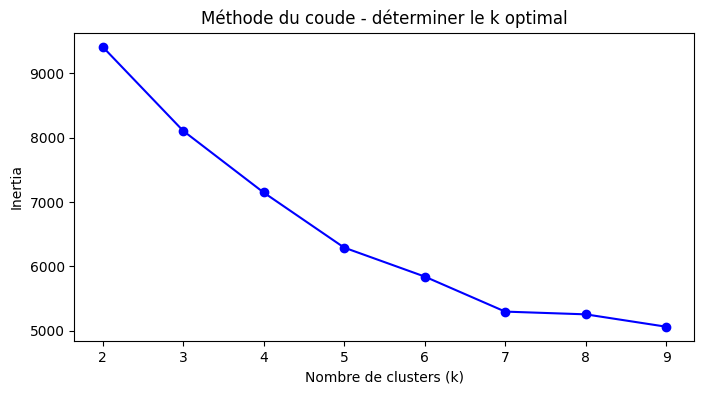

In [21]:
inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'o-', color='b')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia')
plt.title('Méthode du coude - déterminer le k optimal')
plt.show()

In [22]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    print(f"k={k} → Silhouette Score: {score:.3f}")

k=2 → Silhouette Score: 0.330
k=3 → Silhouette Score: 0.256
k=4 → Silhouette Score: 0.264
k=5 → Silhouette Score: 0.241
k=6 → Silhouette Score: 0.247
k=7 → Silhouette Score: 0.249
k=8 → Silhouette Score: 0.236
k=9 → Silhouette Score: 0.230


In [23]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [24]:
cluster_profile = df.groupby("Cluster")[[
    "Frequency", "Monetary", "Income", "Age", "TotalKids", "NumWebVisitsMonth", "Campaign_Accept_Rate"
]].mean().round(2)

cluster_profile

,Frequency,Monetary,Income,Age,TotalKids,NumWebVisitsMonth,Campaign_Accept_Rate
Cluster,,,,,,,
0,21.24,1567.02,80212.76,54.60,0.29,3.58,0.50
1,12.01,281.18,47213.52,67.65,0.75,4.94,0.02
2,19.60,1325.88,77559.77,57.07,0.08,2.18,0.06
3,23.19,928.29,61713.54,58.88,1.12,5.58,0.04
4,9.26,116.13,40878.04,59.97,2.12,6.36,0.02
5,8.11,111.97,30407.88,46.38,0.86,6.96,0.02
6,11.00,62.00,666666.00,48.00,1.00,6.00,0.00


In [25]:
df["Cluster"].value_counts().sort_index()

Cluster
0    119
1    238
2    344
3    459
4    341
5    537
6      1
Name: count, dtype: int64

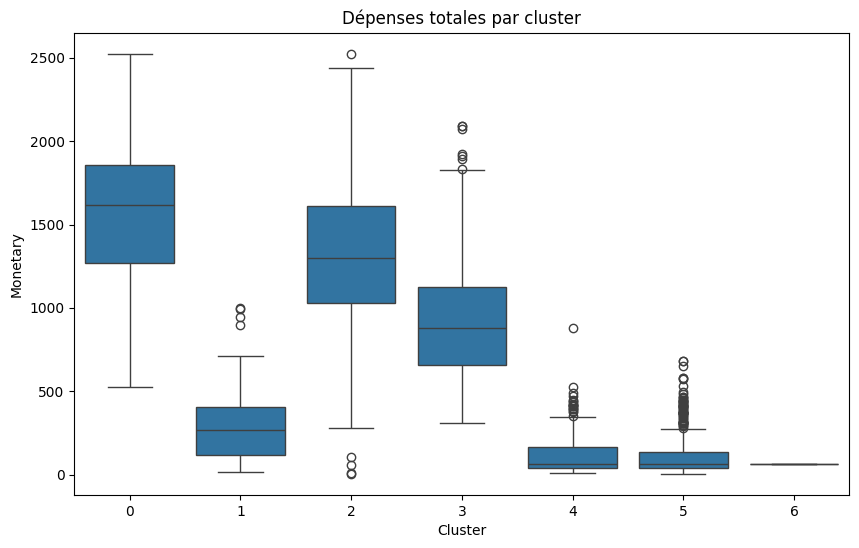

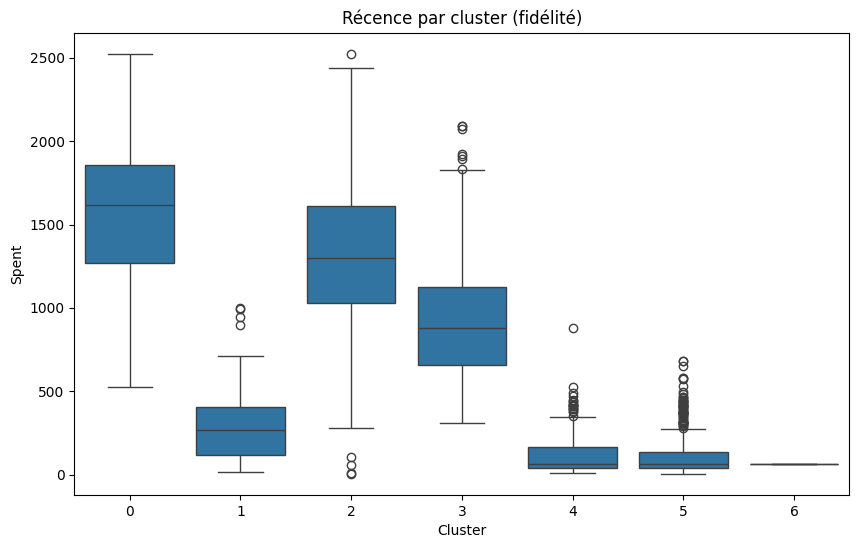

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Cluster", y="Monetary")
plt.title("Dépenses totales par cluster")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Cluster", y="Spent")
plt.title("Récence par cluster (fidélité)")
plt.show()

In [27]:
df.to_csv("Camp_Market_segmented.csv", index=False)

cluster_profile.to_csv("Customer_Cluster_Profile.csv")